In [85]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = './telco.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset for an overview
df.head()


,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


In [86]:

dummy_cols = ["churn",'region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat']

df = pd.get_dummies(df,
               columns=dummy_cols,
               prefix=dummy_cols,
               drop_first=True)


df['const'] = 1
df.head()

,ID,tenure,age,address,income,churn_Yes,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,...,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,const
0,1,13,44,9,64,True,True,False,False,False,...,False,False,True,False,False,True,False,False,False,1
1,2,11,33,7,136,True,False,True,False,False,...,False,False,True,True,False,True,False,False,True,1
2,3,68,52,24,116,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,1
3,4,33,33,12,33,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,1
4,5,23,30,9,30,False,True,False,False,True,...,False,False,True,False,False,True,False,True,False,1


<Axes: >

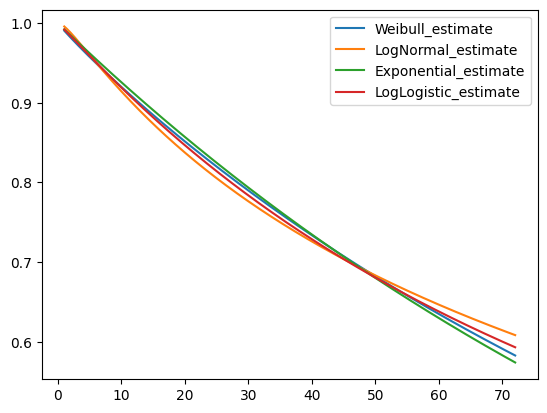

In [87]:
from lifelines import WeibullFitter, ExponentialFitter, LogNormalFitter, LogLogisticFitter


weibull_aft = WeibullFitter()
lognormal_aft = LogNormalFitter()
exponential_aft = ExponentialFitter()
loglogistic_aft = LogLogisticFitter()

weibull_aft.fit(durations = df["tenure"], event_observed = df["churn_Yes"]).plot_survival_function(ci_show=False)
lognormal_aft.fit(durations = df["tenure"], event_observed = df["churn_Yes"]).plot_survival_function(ci_show=False)
exponential_aft.fit(durations = df["tenure"], event_observed = df["churn_Yes"]).plot_survival_function(ci_show=False)
loglogistic_aft.fit(durations = df["tenure"], event_observed = df["churn_Yes"]).plot_survival_function(ci_show=False)

In [88]:


weibull_aft.fit(durations = df["tenure"], event_observed = df["churn_Yes"])
print(f"AIC for Weibull Fitter is {weibull_aft.AIC_}")
print(f"BIC for Weibull Fitter is {weibull_aft.BIC_}")

lognormal_aft.fit(durations = df["tenure"], event_observed = df["churn_Yes"])
print(f"AIC for lognormal Fitter is {lognormal_aft.AIC_}")
print(f"BIC for lognormal Fitter is {lognormal_aft.BIC_}")

exponential_aft.fit(durations = df["tenure"], event_observed = df["churn_Yes"])
print(f"AIC for exponential Fitter is {exponential_aft.AIC_}")
print(f"BIC for exponential Fitter is {exponential_aft.BIC_}")

loglogistic_aft.fit(durations = df["tenure"], event_observed = df["churn_Yes"])
print(f"AIC for loglogistic Fitter is {loglogistic_aft.AIC_}")
print(f"BIC for loglogistic Fitter is {loglogistic_aft.BIC_}")




AIC for Weibull Fitter is 3216.8611706815464
BIC for Weibull Fitter is 3226.676681239511
AIC for lognormal Fitter is 3209.0351474316735
BIC for lognormal Fitter is 3218.850657989638
AIC for exponential Fitter is 3215.9608134637247
BIC for exponential Fitter is 3220.868568742707
AIC for loglogistic Fitter is 3214.4154757933375
BIC for loglogistic Fitter is 3224.230986351302


We pick lognormal Fitter

In [89]:
from lifelines import LogNormalAFTFitter

best = LogNormalAFTFitter()
best.fit(df, duration_col='tenure', event_col='churn_Yes')
best.print_summary()

/Users/075072/Desktop/ma_hw3/venv/lib/python3.10/site-packages/lifelines/fitters/__init__.py:2097: StatisticalWarning: The diagonal of the variance_matrix_ has negative values. This could be a problem with LogNormalAFTFitter's fit to the data.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

  warnings.warn(warning_text, exceptions.StatisticalWarning)


<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1454.15
         time fit was run = 2023-11-22 14:02:54 UTC

---
                                         coef  exp(coef)           se(coef)       coef lower 95%      coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                                              
mu_    ID                               -0.00       1.00               0.00                -0.00               -0.00                 1.00                 1.00
       address                           0.04       1.04               0.01                 0.03                0.06                 1.03                 1.06
       age                               0.03       1.03               0.01                 0.02                0.05                 1.02                 1.05
       const                             2.07       7.90 887626305322566.00 -1739715590162581.00 1739715590162585.00                 0.00                  inf
       custcat_E-service                 1.06       2.90               0.17                 0.72                1.40                 2.06                 4.07
       custcat_Plus service              0.94       2.55               0.22                 0.52                1.36                 1.67                 3.90
       custcat_Total service             1.21       3.35               0.24                 0.73                1.69                 2.08                 5.40
       ed_Did not complete high school   0.38       1.46               0.20                -0.02                0.77                 0.98                 2.16
       ed_High school degree             0.31       1.36               0.16                -0.01                0.62                 0.99                 1.87
       ed_Post-undergraduate degree     -0.05       0.95               0.22                -0.48                0.38                 0.62                 1.46
       ed_Some college                   0.29       1.33               0.16                -0.04                0.61                 0.96                 1.83
       forward_Yes                      -0.20       0.82               0.18                -0.55                0.15                 0.57                 1.16
       gender_Male                       0.04       1.04               0.11                -0.19                0.26                 0.83                 1.30
       income                            0.00       1.00               0.00                -0.00                0.00                 1.00                 1.00
       internet_Yes                     -0.79       0.45               0.14                -1.07               -0.51                 0.34                 0.60
       marital_Unmarried                -0.44       0.64               0.10                -0.65               -0.24                 0.52                 0.79
       region_Zone 2                    -0.09       0.91                NaN                  NaN                 NaN                  NaN                  NaN
       region_Zone 3                     0.06       1.06               0.10                -0.14                0.26                 0.87                 1.29
       retire_Yes                        0.02       1.02               0.50                -0.95                1.00                 0.39                 2.72
       voice_Yes                        -0.41       0.66               0.17                -0.74               -0.08                 0.48                 0.92
       Intercept                         0.50       1.66 887626305322566.50 -1739715590162583.50 1739715590162584.50                 0.00                  inf
sigma_

In [90]:
df = df[["tenure", "churn_Yes", "address", "age", "custcat_E-service", "custcat_Plus service", "custcat_Total service", "internet_Yes", "marital_Unmarried", "voice_Yes"]]
best = LogNormalAFTFitter()
best.fit(df, duration_col='tenure', event_col='churn_Yes')
best.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2023-11-22 14:02:55 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.78
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

In [91]:
pred = best.predict_survival_function(df)
pred # pred for next 100 points or months

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1.0,0.999688,0.999736,0.999999,0.997985,0.999870,0.999934,0.996781,0.993548,0.999994,0.999997,...,0.999828,0.999961,0.999668,1.000000,0.999781,0.996036,0.995073,0.999991,0.999923,0.999471
2.0,0.998129,0.998378,0.999988,0.990703,0.999127,0.999519,0.986180,0.975242,0.999946,0.999965,...,0.998883,0.999699,0.998022,0.999998,0.998622,0.983532,0.980236,0.999915,0.999446,0.997040
3.0,0.995250,0.995831,0.999956,0.979723,0.997635,0.998631,0.971075,0.951403,0.999818,0.999879,...,0.997036,0.999113,0.995004,0.999992,0.996407,0.966176,0.960211,0.999724,0.998443,0.992790
4.0,0.991268,0.992267,0.999893,0.966472,0.995448,0.997273,0.953528,0.925327,0.999593,0.999724,...,0.994377,0.998186,0.990846,0.999979,0.993269,0.946364,0.937776,0.999396,0.996923,0.987122
5.0,0.986400,0.987874,0.999796,0.951860,0.992655,0.995483,0.934724,0.898616,0.999264,0.999491,...,0.991029,0.996934,0.985782,0.999957,0.989366,0.925411,0.914381,0.998926,0.994934,0.980384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68.0,0.595597,0.612735,0.941530,0.380751,0.681995,0.740246,0.324647,0.244165,0.887519,0.906396,...,0.655478,0.780519,0.588828,0.975035,0.631761,0.300058,0.274774,0.864845,0.727282,0.537869
69.0,0.591329,0.608517,0.940235,0.376567,0.678061,0.736667,0.320700,0.240726,0.885403,0.904544,...,0.651418,0.777252,0.584544,0.974386,0.627607,0.296244,0.271117,0.862440,0.723614,0.533498
70.0,0.587113,0.604347,0.938937,0.372457,0.674164,0.733115,0.316829,0.237363,0.883290,0.902692,...,0.647400,0.774006,0.580311,0.973732,0.623498,0.292507,0.267537,0.860042,0.719976,0.529186
71.0,0.582946,0.600224,0.937635,0.368420,0.670304,0.729590,0.313033,0.234073,0.881180,0.900841,...,0.643423,0.770779,0.576130,0.973074,0.619433,0.288845,0.264031,0.857649,0.716367,0.524932
